<a href="https://colab.research.google.com/github/Navjotkhatri/Data-Scientist-Salary-Analysis/blob/main/Data_Scientist_worldwide_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project-Data Scientist worldwide Salary Analysis**
**Contributor-Navjot Khatri**

**Content**

**Column-Description**

work_year	The year the salary was paid.

experience_level	-The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type	-The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

job_title	-The role worked in during the year.

salary	-The total gross salary amount paid.

salary_currency	-The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd	-The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence	-Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio	-The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location	-The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size	-The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [156]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
#reading csv file-1
working_dir_path="/content/drive/MyDrive/Colab Notebooks/Self Projects/Data  Scientist Salary Analysis/ds_salaries.csv"
sl_df=pd.read_csv(working_dir_path)

In [159]:
sl_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [160]:
sl_df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [161]:
sl_df.shape

(607, 12)

In [162]:
sl_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [163]:
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [164]:
sl_df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [165]:
sl_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [166]:
sl_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [167]:
sl_df['employee_residence'] = sl_df['employee_residence'].astype('category')
sl_df['company_location'] = sl_df['company_location'].astype('category')
sl_df['company_size'] = sl_df['company_size'].astype('category')
sl_df['experience_level'] = sl_df['experience_level'].astype('category')
sl_df['employment_type'] = sl_df['employment_type'].astype('category')

In [168]:
sl_df['experience_level'].unique()

['MI', 'SE', 'EN', 'EX']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

In [169]:
sl_df['employment_type'].unique()

['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']

In [170]:
sl_df['company_size'].unique()

['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']

In [171]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


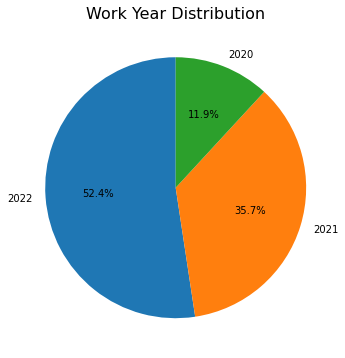

In [172]:
plt.figure(figsize=(8,6))
plt.title("Work Year Distribution",fontsize = 16)
plt.pie(sl_df.work_year.value_counts(), labels=sl_df.work_year.value_counts().index,autopct='%1.1f%%',startangle=90)
plt.show()

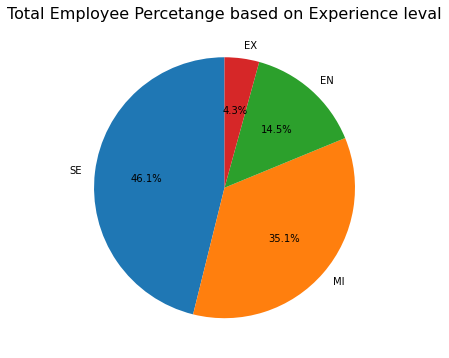

In [173]:
#pie chart 
plt.figure(figsize=(8,6))
plt.title("Total Employee Percetange based on Experience leval",fontsize = 16)
plt.pie(sl_df.experience_level.value_counts(), labels=sl_df.experience_level.value_counts().index,autopct='%1.1f%%',startangle=90)
plt.show()


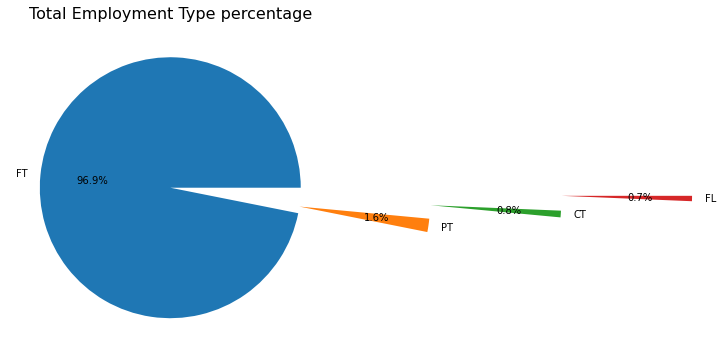

In [174]:
#pie chart 
plt.figure(figsize=(8,6))
plt.title("Total Employment Type percentage",fontsize = 16)
plt.pie(sl_df.employment_type.value_counts(), labels=sl_df.employment_type.value_counts().index,autopct='%1.1f%%',startangle=360,explode=(0,1,2,3))
plt.show()


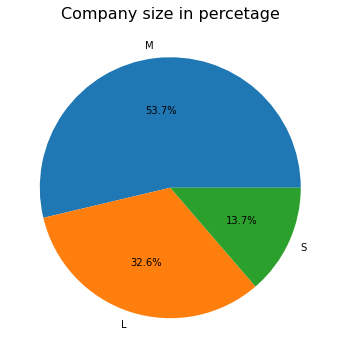

In [175]:
plt.figure(figsize=(8,6))
plt.title("Company size in percetage",fontsize = 16)
plt.pie(sl_df.company_size	.value_counts(), labels=sl_df.company_size	.value_counts().index,autopct='%1.1f%%')
plt.show()

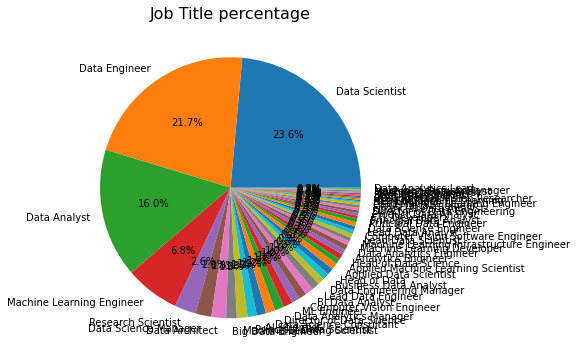

In [176]:
plt.figure(figsize=(8,6))
plt.title("Job Title percentage",fontsize = 16)
plt.pie(sl_df.job_title	.value_counts(), labels=sl_df.job_title	.value_counts().index,autopct='%1.1f%%')
plt.show()

In [177]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [178]:
df1=sl_df.groupby('experience_level')['salary_in_usd'].mean().reset_index(name="Average Salary")
df1=df1.sort_values(by=['Average Salary'],ascending=False)

In [179]:
df1

,experience_level,Average Salary
1,EX,199392.038462
3,SE,138617.292857
2,MI,87996.056338
0,EN,61643.318182


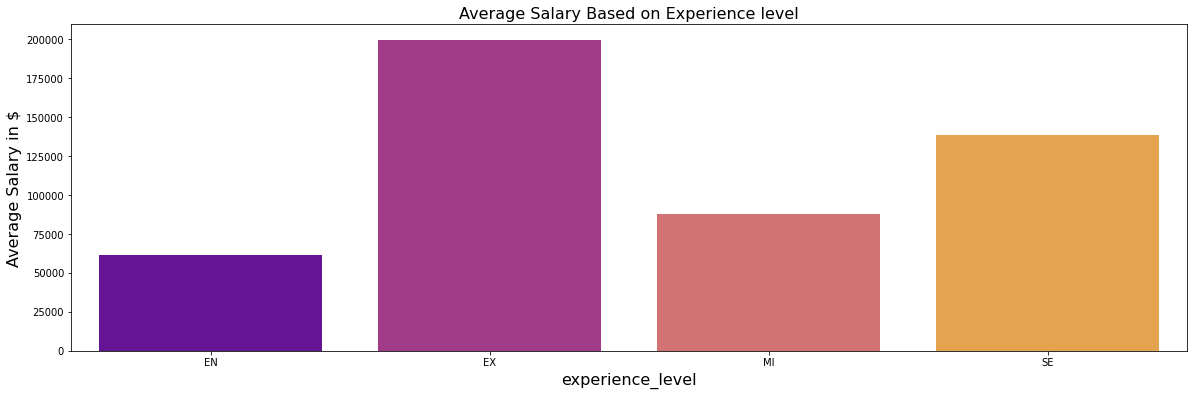

In [180]:
plt.figure(figsize=(20,6))
plt.title("Average Salary Based on Experience level",fontsize=16)
sns.barplot(data=df1,x="experience_level",y="Average Salary",palette="plasma")
plt.xlabel('experience_level',fontsize=16)
plt.ylabel('Average Salary in $',fontsize=16)
plt.show()

In [181]:
df2=sl_df.groupby('experience_level')['employment_type'].count().reset_index()


In [182]:
df2

,experience_level,employment_type
0,EN,88
1,EX,26
2,MI,213
3,SE,280


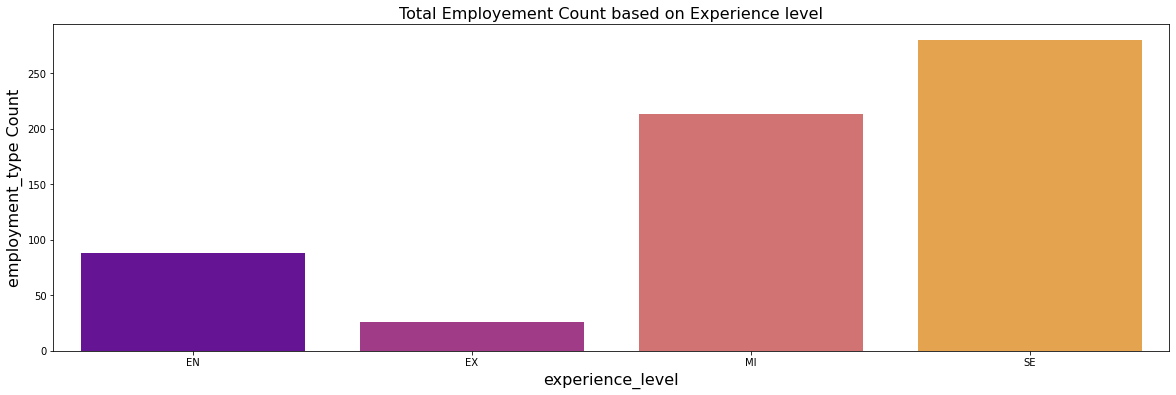

In [183]:
plt.figure(figsize=(20,6))
plt.title("Total Employement Count based on Experience level",fontsize=16)
sns.barplot(data=df2,x="experience_level",y="employment_type",palette="plasma")
plt.xlabel('experience_level',fontsize=16)
plt.ylabel('employment_type Count',fontsize=16)
plt.show()

In [184]:
df3=sl_df.groupby('experience_level')['job_title'].sum()


In [185]:
df3= sl_df.groupby(['experience_level', 'job_title']).size().reset_index(name="total_job_title")



In [186]:
df3

,experience_level,job_title,total_job_title
0,EN,3D Computer Vision Researcher,0
1,EN,AI Scientist,4
2,EN,Analytics Engineer,0
3,EN,Applied Data Scientist,1
4,EN,Applied Machine Learning Scientist,1
...,...,...,...
195,SE,Principal Data Engineer,2
196,SE,Principal Data Scientist,5
197,SE,Product Data Analyst,0
198,SE,Research Scientist,5


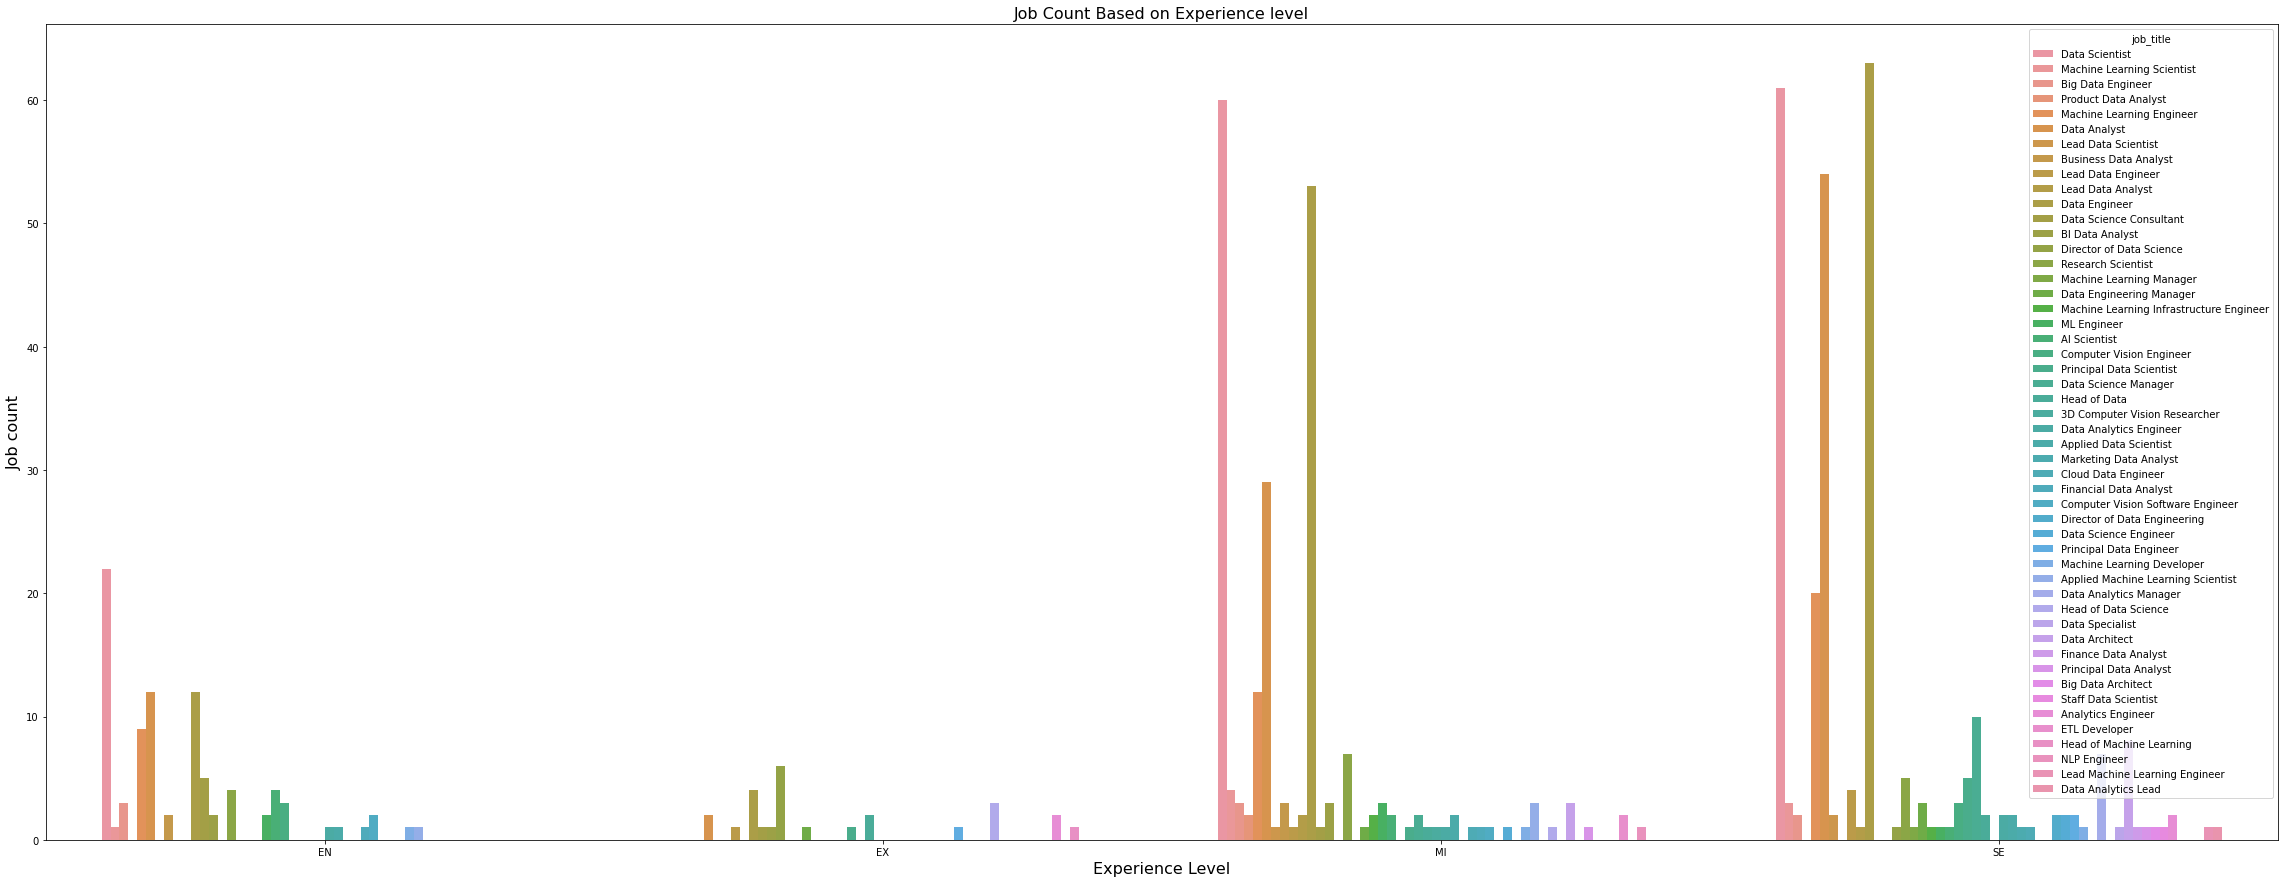

In [187]:
plt.figure(figsize=(40,15))
plt.title("Job Count Based on Experience level",fontsize=16)
sns.countplot(data=sl_df,x='experience_level',hue=sl_df.job_title)
plt.xlabel("Experience Level",fontsize=16)
plt.ylabel("Job count",fontsize=16)
plt.show()

In [188]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


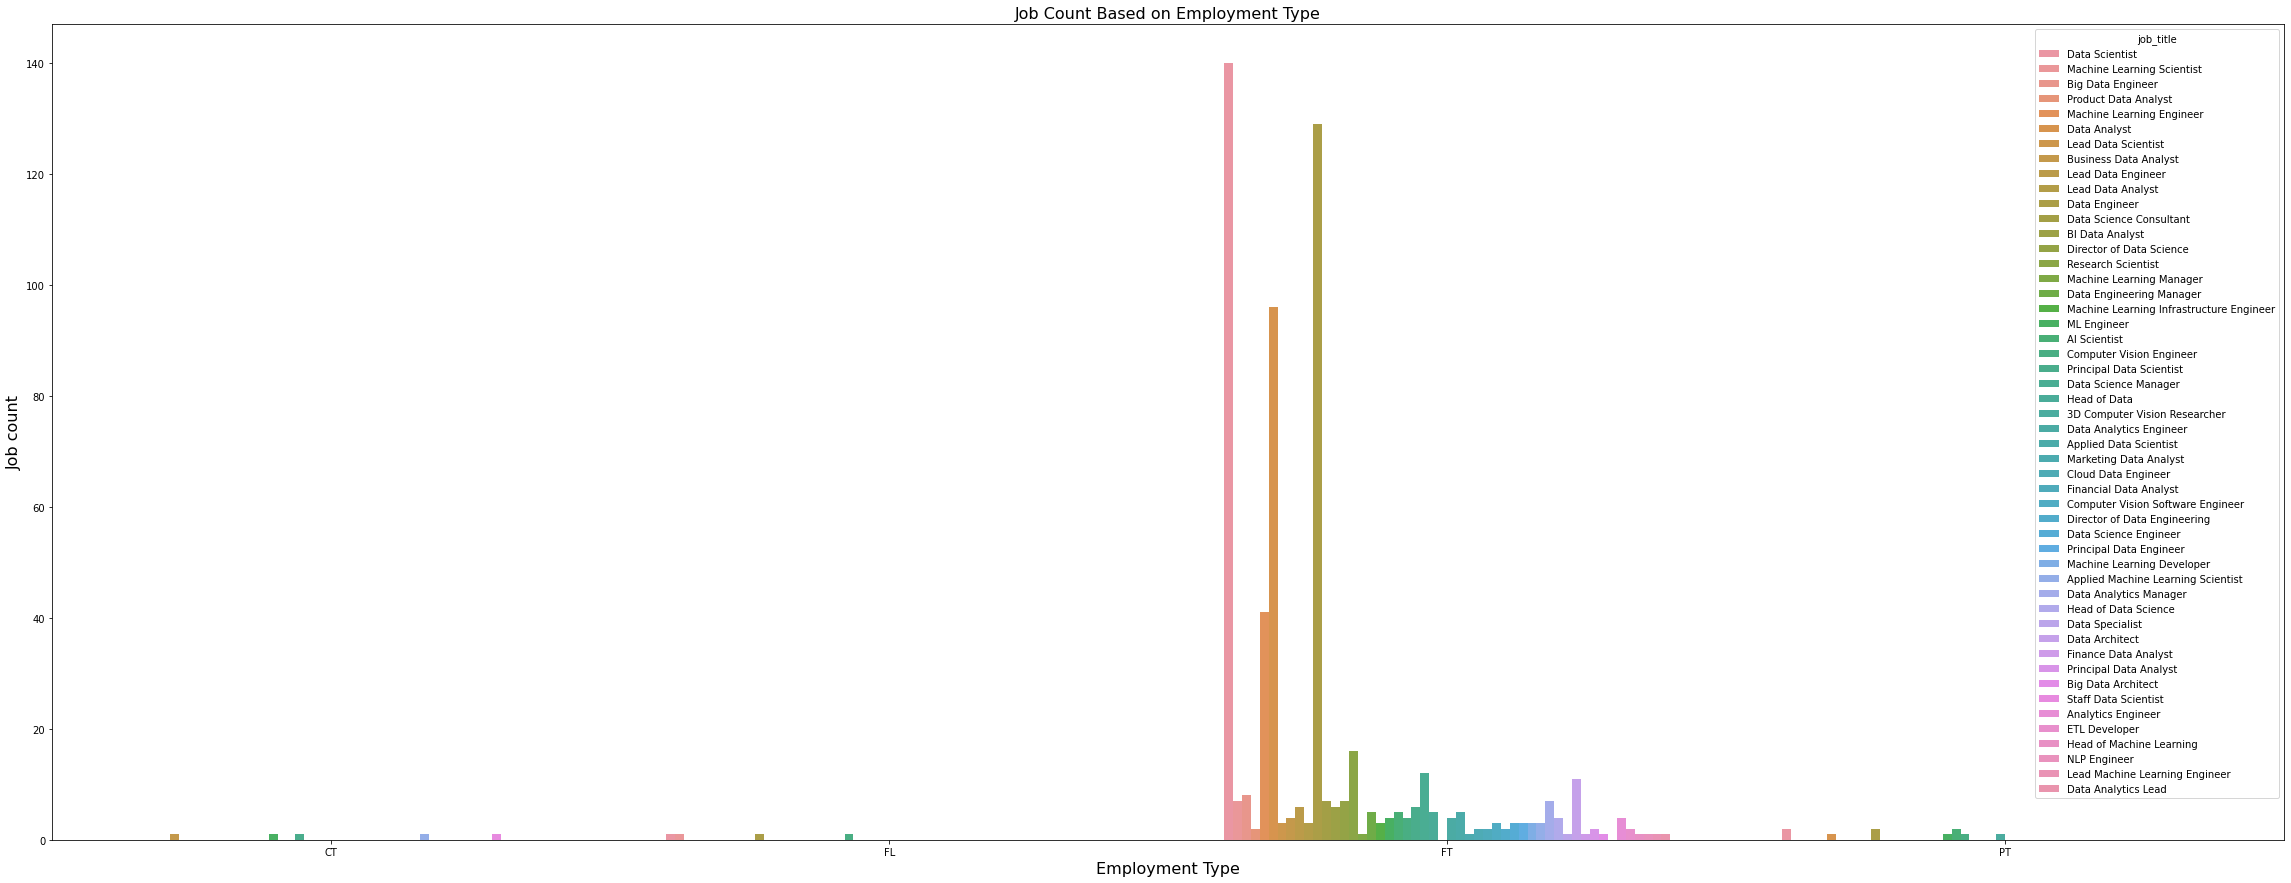

In [189]:
plt.figure(figsize=(40,15))
plt.title("Job Count Based on Employment Type",fontsize=16)
sns.countplot(data=sl_df,x='employment_type',hue=sl_df.job_title)
plt.xlabel("Employment Type",fontsize=16)
plt.ylabel("Job count",fontsize=16)
plt.show()

In [190]:
df4=sl_df.groupby('job_title')['salary_in_usd'].mean().reset_index(name="Average Salary")
df4=df4.sort_values(by=['Average Salary'],ascending=False)

In [191]:
df4

,job_title,Average Salary
14,Data Analytics Lead,405000.000000
45,Principal Data Engineer,328333.333333
28,Financial Data Analyst,275000.000000
46,Principal Data Scientist,215242.428571
25,Director of Data Science,195074.000000
16,Data Architect,177873.909091
3,Applied Data Scientist,175655.000000
2,Analytics Engineer,175000.000000
23,Data Specialist,165000.000000
29,Head of Data,160162.600000


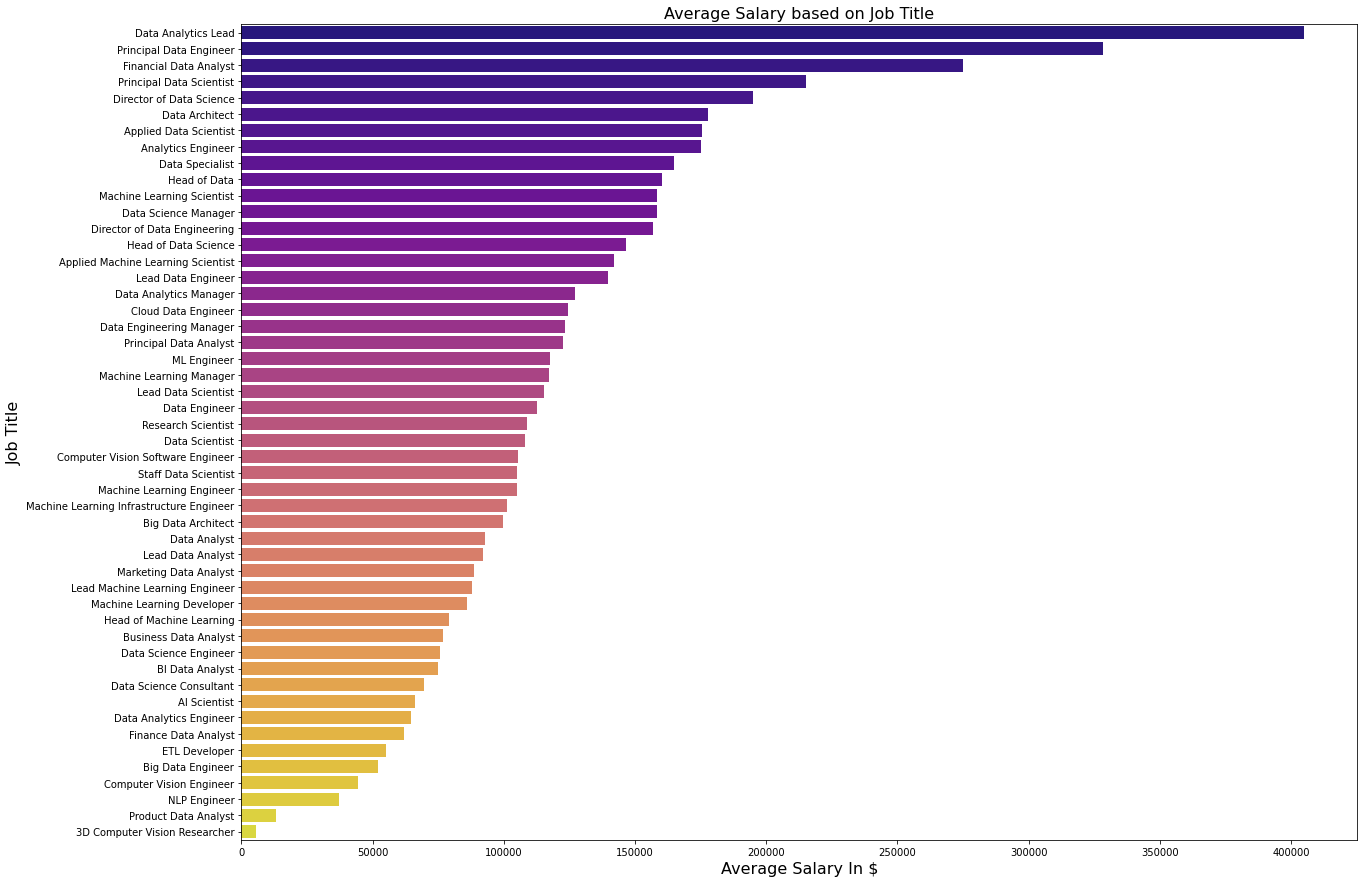

In [192]:
plt.figure(figsize=(20,15))
plt.title("Average Salary based on Job Title",fontsize=16)
sns.barplot(data=df4,y="job_title",x="Average Salary",palette="plasma")
plt.xlabel('Average Salary In $',fontsize=16)
plt.ylabel('Job Title',fontsize=16)
plt.show()

In [193]:
sl_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [194]:
df5= sl_df.groupby(['experience_level','job_title'])['salary_in_usd'].mean().reset_index(name="Average Salary in $")


In [195]:
df5

,experience_level,job_title,Average Salary in $
0,EN,3D Computer Vision Researcher,NaN
1,EN,AI Scientist,21987.25
2,EN,Analytics Engineer,NaN
3,EN,Applied Data Scientist,110037.00
4,EN,Applied Machine Learning Scientist,31875.00
...,...,...,...
195,SE,Principal Data Engineer,192500.00
196,SE,Principal Data Scientist,187939.40
197,SE,Product Data Analyst,NaN
198,SE,Research Scientist,88859.40


In [196]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   experience_level     200 non-null    category
 1   job_title            200 non-null    object  
 2   Average Salary in $  105 non-null    float64 
dtypes: category(1), float64(1), object(1)
memory usage: 3.6+ KB


In [197]:
df5.dropna()


,experience_level,job_title,Average Salary in $
1,EN,AI Scientist,21987.250000
3,EN,Applied Data Scientist,110037.000000
4,EN,Applied Machine Learning Scientist,31875.000000
5,EN,BI Data Analyst,32136.000000
7,EN,Big Data Engineer,30703.333333
...,...,...,...
194,SE,Principal Data Analyst,170000.000000
195,SE,Principal Data Engineer,192500.000000
196,SE,Principal Data Scientist,187939.400000
198,SE,Research Scientist,88859.400000


In [198]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   experience_level     200 non-null    category
 1   job_title            200 non-null    object  
 2   Average Salary in $  105 non-null    float64 
dtypes: category(1), float64(1), object(1)
memory usage: 3.6+ KB


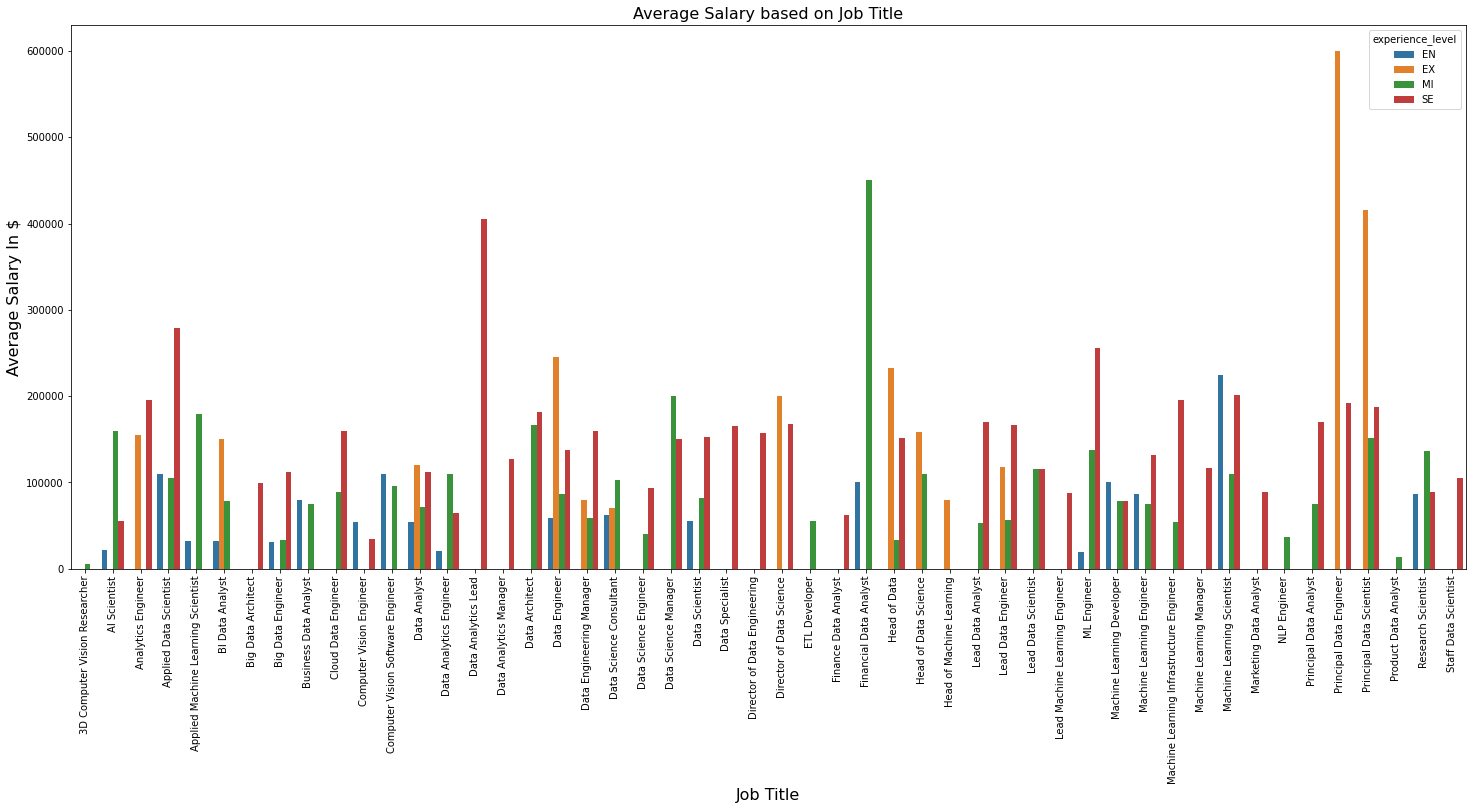

In [205]:
plt.figure(figsize=(25,10))
plt.title("Average Salary based on Job Title",fontsize=16)
sns.barplot(data=df5,x="job_title",y="Average Salary in $", hue='experience_level')
plt.ylabel('Average Salary In $',fontsize=16)
plt.xlabel('Job Title',fontsize=16)
plt.xticks(rotation=90)

plt.show()